# Setup

In [1]:
#world_coords 
# preparing datasets
# final_arxiv_2025_with_affil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams.update({'figure.dpi': 150})


In [2]:
df = pd.read_csv("../test_filled_21.csv")
df.head()

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,comments,journals,num_checks,affiliations,total_citations,non_self_citations,countries
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-01,"Submitted to AAS Journals. 10 pages, 4 figures...","ApJ (2025), 980 183",0,"['Space Telescope Science Institute, 3700 San ...",3.0,1.0,['USA']
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['powered by accretion of matter from a compan...,2025-01-01,"19 pages, 12 figures, accepted for publication...",NaN,0,"['School of Mathematics, Statistics and Physic...",0.0,0.0,"[None, None, None, None, None, None, None]"
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,NaN,[],2025-01-01,Accepted for publication in IEEE Transactions ...,NaN,0,"['INAF/IAPS, 00133, Rome, Italy', 'INAF/IAPS, ...",1.0,0.0,"['Italy', 'Italy', 'Italy', 'Italy', 'Italy', ..."
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,NaN,"['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",2025-01-01,Proceeding presented at the 8th Heidelberg Int...,NaN,0,['Istituto Nazionale di Astrofisica – Osservat...,0.0,0.0,"[None, None, None, None]"
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,NaN,['galaxies: rotation curve - galaxies: fundame...,2025-01-01,"19 pages, 12 figures, ApJ accepted",NaN,0,"[""Shanghai Astronomical Observatory, Chinese A...",4.0,3.0,"[""People's Republic of China"", ""People's Repub..."


Biggest Collaboration

In [3]:
#What is the maximum number of authors in a paper?
max_authors = 0
max_idx = 0
for idx, row in df.iterrows():
    authors = len(row['authors'])
    if authors > max_authors:
        max_authors = authors
        max_idx = idx

print(max_authors)
print(max_idx)
print(df.loc[max_idx]['title'])

26242
9186
GW231123: a Binary Black Hole Merger with Total Mass 190-265 $M_{\odot}$


Author with most papers: J. Carretero with 139 papers.
Mean: 2.7785225941360543
Median: 1.0
Mode: 1


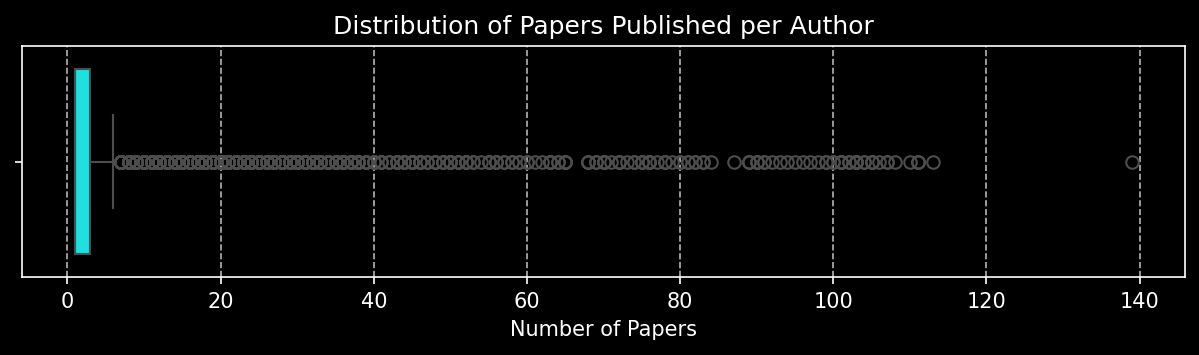

In [4]:
import ast
from collections import Counter

def parse_authors(x):
    try:
        if isinstance(x, str):
            # ArXiv authors sometimes use double quotes inside or single quotes. 
            # literal_eval is usually safe for these exports.
            return ast.literal_eval(x)
        return x
    except:
        return []

all_authors = []
for authors_str in df['authors']:
    authors_list = parse_authors(authors_str)
    if isinstance(authors_list, list):
        all_authors.extend(authors_list)

author_counts = Counter(all_authors)
most_common = author_counts.most_common(1)

if most_common:
    print(f"Author with most papers: {most_common[0][0]} with {most_common[0][1]} papers.")
else:
    print("No authors found.")

# Create boxplot for papers published by each person
counts = list(author_counts.values())
#printing the mean median and mode of the counts
print(f"Mean: {np.mean(counts)}")
print(f"Median: {np.median(counts)}")
print(f"Mode: {Counter(counts).most_common(1)[0][0]}")

plt.figure(figsize=(10, 2))
sns.boxplot(x=counts, color='cyan')
plt.title('Distribution of Papers Published per Author')
plt.xlabel('Number of Papers')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [5]:
import ast
import statistics
import re
import difflib
from collections import defaultdict

def normalize_affiliation(affil):
    if not affil:
        return None
    
    # 1. FIX AMPERSANDS FIRST
    # Handle both with and without semicolon, and standard HTML entities
    affil = str(affil).replace('&amp;', '&').replace('&amp', '&').replace('\\&', '&')
    
    # 2. Basic Cleanup
    affil = affil.lower().strip()
    affil = affil.strip("'").strip('"').strip()
    
    # 3. Standardize Abbreviations
    affil = re.sub(r'\bdrive\b', 'dr', affil)
    affil = re.sub(r'\bstreet\b', 'st', affil)
    affil = re.sub(r'\broad\b', 'rd', affil)
    affil = re.sub(r'\bdepartment\b', 'dept', affil)
    affil = re.sub(r'\buniversity\b', 'univ', affil)
    affil = re.sub(r'\binstitute\b', 'inst', affil)
    
    # 4. Remove Street Addresses (Aggressive)
    # Removes patterns like "3400 n charles st" or "3700 san martin dr"
    affil = re.sub(r'\b\d{1,5}\s+[a-z0-9\s\.]+(st|dr|rd|ave|blvd)\b', '', affil)
    
    # 5. Fix formatting caused by removals
    # Remove double commas created by removing words in the middle
    affil = re.sub(r',\s*,', ',', affil)
    # Remove extra spaces
    affil = re.sub(r'\s+', ' ', affil).strip(' ,')
    
    # 6. Remove trailing ampersands (Fixes "dept of physics &")
    affil = affil.strip('&').strip()

    # Skip fragments
    if len(affil) < 8 or "', '" in affil:
        return None
        
    return affil

def deduplicate_affiliations(aff_list):
    """
    Consolidates similar affiliations using substring and fuzzy matching.
    """
    if not aff_list:
        return []
    
    # Sort by length descending (keep longest/most detailed versions)
    # We use a set first to remove exact string duplicates immediately
    candidates = sorted(list(set(aff_list)), key=len, reverse=True)
    
    final_list = []
    
    for cand in candidates:
        is_duplicate = False
        for existing in final_list:
            # Check 1: Substring (e.g. "astronomy, jhu" is in "dept of physics & astronomy, jhu")
            if cand in existing:
                is_duplicate = True
                break
            
            # Check 2: Fuzzy Match (e.g. typos or small word order changes)
            # 85% similarity threshold
            if difflib.SequenceMatcher(None, cand, existing).ratio() > 0.85:
                is_duplicate = True
                break
        
        if not is_duplicate:
            final_list.append(cand)
            
    return final_list

# --- PROCESSING ---

# Use a dictionary of lists initially
raw_affil_dict = defaultdict(list)

for _, row in df.iterrows():
    try:
        authors = ast.literal_eval(row['authors'])
        affiliations = ast.literal_eval(row['affiliations'])
        
        for author, aff_str in zip(authors, affiliations):
            if not aff_str: continue
            
            # Split by semicolon
            aff_list = [a.strip() for a in aff_str.split(';') if a.strip()]
            
            for aff in aff_list:
                norm = normalize_affiliation(aff)
                if norm:
                    raw_affil_dict[author].append(norm)
                    
    except (ValueError, SyntaxError, AttributeError):
        continue

# --- DEDUPLICATION PASS ---
affil_dict = {}
for author, affs in raw_affil_dict.items():
    affil_dict[author] = deduplicate_affiliations(affs)

# --- OUTPUT ---
num_affiliations = [len(affs) for affs in affil_dict.values()]

if num_affiliations:
    print(f"Mean: {statistics.mean(num_affiliations):.2f}")
    print(f"Median: {statistics.median(num_affiliations)}")
    print(f"Mode: {statistics.mode(num_affiliations)}")

print(f"\nJohn F. Wu affiliations: {len(affil_dict.get('John F. Wu', []))}")
for affil in sorted(affil_dict.get('John F. Wu', [])):
    print(f"  - {affil}")

Mean: 2.22
Median: 1
Mode: 1

John F. Wu affiliations: 4
  - center for astrophysical sciences, johns hopkins univ, baltimore, md 21218, usa
  - dept of computer science, johns hopkins univ, baltimore, md 21218, usa
  - dept of physics & astronomy, johns hopkins univ, baltimore, md 21218, usa
  - space telescope science inst, baltimore, md 21218, usa


In [6]:
# Identify authors with 3+ affiliations
multi_affil_authors = {k: v for k, v in affil_dict.items() if len(v) >= 3}

print(f"Total authors with 3+ affiliations: {len(multi_affil_authors)}")
print("-" * 50)

# Print the first 5 examples (or remove [:5] to see all)
for author, affiliations in list(multi_affil_authors.items())[:2]:
    print(f"\nAuthor: {author} ({len(affiliations)} affiliations)")
    for aff in affiliations:
        print(f"  - {aff}")

Total authors with 3+ affiliations: 13736
--------------------------------------------------

Author: John F. Wu (4 affiliations)
  - center for astrophysical sciences, johns hopkins univ, baltimore, md 21218, usa
  - dept of physics & astronomy, johns hopkins univ, baltimore, md 21218, usa
  - dept of computer science, johns hopkins univ, baltimore, md 21218, usa
  - space telescope science inst, baltimore, md 21218, usa

Author: Adam Ingram (4 affiliations)
  - school of mathematics, statistics and physics, newcastle univ, herschel building, newcastle-upon-tyne, ne1 7ru, uk
  - dept of astronomy, school of physics and technology, wuhan univ, wuhan 430072, people's republic of china
  - dept of physics, astrophysics, univ of oxford, denys wilkinson building, keble rd, oxford ox1 3rh, uk
  - school of mathematics, statistics, and physics, newcastle univ, ne1 7ru, newcastle upon tyne, uk


In [7]:
import folium
from folium import plugins
from matplotlib import cm
from matplotlib.colors import to_hex
import numpy as np
import ast
from collections import Counter
from IPython.display import IFrame
import pandas as pd

# cross country collaborations
df2 = pd.read_csv('../world_coords.csv', delimiter=',')

# Parse the countries column properly before exploding
df['countries_parsed'] = df['countries'].apply(ast.literal_eval)
country_counts = df['countries_parsed'].explode().value_counts().reset_index()
country_counts.columns = ['country', 'repeats']

# Load coordinates
try:
    coords_df = pd.read_csv('../world_coords.csv')
    coords_df = coords_df[['country', 'latitude', 'longitude']]
except Exception as e:
    print(f"Error loading world_coords.csv: {e}")
    coords_df = pd.DataFrame(columns=['country', 'latitude', 'longitude'])

# Merge data
df_plot = country_counts.merge(coords_df, on='country', how='inner')

print(f"Number of countries in df_plot: {len(df_plot)}")

# Country name mapping to match GeoJSON - FIXED
country_name_mapping = {
    'Czech Republic': 'Czech Rep.',
    'South Korea': 'Dem. Rep. Korea',
    'Vatican City': 'Vatican',
    'USA': 'United States',
    'United States of America': 'United States',
    'UK': 'United Kingdom',
    'The Netherlands': 'Netherlands',
}

# Apply mapping
df_plot['country_mapped'] = df_plot['country'].apply(
    lambda x: country_name_mapping.get(x, x)
)

# Initialize the map
political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)
m = folium.Map(location=(40, 0), zoom_start=2.3, tiles="cartodb positron")

# Add choropleth
folium.Choropleth(
    geo_data=political_countries_url,
    data=df_plot,
    columns=("country_mapped", "repeats"),
    key_on="feature.properties.name",
    fill_color="RdYlGn_r",
    fill_opacity=0.8,
    line_opacity=0.1,
    nan_fill_color="white",
    legend_name="Collaborations",
    color="black",
).add_to(m)

# Create color map for countries
all_countries = df2['country'].unique()
colormap = cm.get_cmap('viridis', len(all_countries))
country_colors = {country: to_hex(colormap(i)) for i, country in enumerate(all_countries)}

# AGGREGATE COLLABORATIONS TO REDUCE LINE COUNT
pair_counts = Counter()
pair_titles = {}
country_names = {}

for idx, row in df.iterrows():
    try:
        countries = ast.literal_eval(row['countries'])
        unique_countries = sorted(list(set(countries)))
        
        if len(unique_countries) >= 3:
            for i in range(len(unique_countries)):
                for j in range(i + 1, len(unique_countries)):
                    c1, c2 = unique_countries[i], unique_countries[j]
                    pair = tuple(sorted((c1, c2)))
                    pair_counts[pair] += 1
                    if pair not in pair_titles:
                        pair_titles[pair] = []
                    if len(pair_titles[pair]) < 5: # Limit popup text to top 5 papers
                        pair_titles[pair].append(row['title'])
    except:
        continue

# Draw collaboration lines from aggregated data
for (c1, c2), count in pair_counts.items():
    if c1 in df2['country'].values and c2 in df2['country'].values:
        lat1 = df2[df2['country'] == c1]['latitude'].values[0]
        lon1 = df2[df2['country'] == c1]['longitude'].values[0]
        lat2 = df2[df2['country'] == c2]['latitude'].values[0]
        lon2 = df2[df2['country'] == c2]['longitude'].values[0]
        
        color = country_colors.get(c1, 'blue')
        weight = min(1 + np.log1p(count), 10) # Logarithmic scale for weight
        
        titles_str = "<br>".join(pair_titles[(c1, c2)])
        if count > 5:
            titles_str += f"<br>... and {count-5} more"
            
        folium.PolyLine(
            locations=[(lat1, lon1), (lat2, lon2)],
            color=color,
            weight=weight,
            opacity=0.3,
            popup=f"<b>{c1} ↔ {c2}</b><br>Collaborations: {count}<br><small>{titles_str}</small>"
        ).add_to(m)

m.save('collaboration_map.html')
print("Map saved to collaboration_map.html")
# Display via IFrame to keep notebook response and reduce file size
display(IFrame(src='collaboration_map.html', width='100%', height='500px'))


Number of countries in df_plot: 102


C:\Users\hetan\AppData\Local\Temp\ipykernel_4024\1726332658.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis', len(all_countries))


Map saved to collaboration_map.html


In [8]:
import pandas as pd
import ast
from collections import Counter
import numpy as np
import folium
from IPython.display import IFrame
from matplotlib import cm, colors
from branca.element import Template, MacroElement

# 0. Extended Country Name Mapping for Coordinates
country_map = {
    'USA': 'United States',
    'UK': 'United Kingdom',
    'Russia': 'Russia',
    'Russian Federation': 'Russia',
    'People\'s Republic of China': 'China',
    'South Korea': 'South Korea',
    'Czech Republic': 'Czech Republic',
    'The Netherlands': 'Netherlands',
    'Hong Kong': 'Hong Kong',
    'South Africa': 'South Africa',
    'Egypt': 'Egypt',
    'Nigeria': 'Nigeria',
    'Kenya': 'Kenya',
    'Ethiopia': 'Ethiopia',
    'Morocco': 'Morocco',
    'Tunisia': 'Tunisia',
    'Algeria': 'Algeria'
}

print("Calculating collaboration statistics...")
# 1. Aggregate collaborations between pairs of countries
pair_counts = Counter()

for countries_str in df['countries']:
    try:
        countries = ast.literal_eval(countries_str)
        normalized_countries = [country_map.get(c, c) for c in countries if c and str(c).lower() != 'none']
        unique_countries = sorted(list(set(normalized_countries)))
        
        if len(unique_countries) > 1:
            for i in range(len(unique_countries)):
                for j in range(i + 1, len(unique_countries)):
                    pair = tuple(sorted((unique_countries[i], unique_countries[j])))
                    pair_counts[pair] += 1
    except:
        continue

# 2. Calculate Statistics
collaboration_values = list(pair_counts.values())
if collaboration_values:
    mean_collabs = np.mean(collaboration_values)
    median_collabs = np.median(collaboration_values)
    counts_freq = Counter(collaboration_values)
    mode_collabs = counts_freq.most_common(1)[0][0]
    
    top_5_pairs = pair_counts.most_common(10)
    
    country_totals = Counter()
    for (c1, c2), count in pair_counts.items():
        country_totals[c1] += count
        country_totals[c2] += count
    
    print("--- Collaboration Statistics ---")
    print(f"Mean collaborations per pair: {mean_collabs:.2f}")
    print(f"Median collaborations per pair: {median_collabs}")
    print(f"Mode collaborations per pair: {mode_collabs}")
    print("\nTOP 5 COLLABORATING PAIRS:")
    for pair, count in top_5_pairs:
        print(f"  - {pair[0]} <-> {pair[1]}: {count} collaborations")
else:
    print("No cross-country collaborations found.")

print("\nGenerating refined map (Threshold: 200, jet colormap, smaller markers)...")
# 3. Create Map with Refined Visualization
if 'df2' not in locals():
    df2 = pd.read_csv('../world_coords.csv')

m_jet = folium.Map(location=(20, 0), zoom_start=2.48, tiles="cartodb positron")

# Colormap based on Intensity
import matplotlib.pyplot as plt
colormap_name = 'jet' # Could also be 'rainbow'
cmap = plt.get_cmap(colormap_name)

# Normalize country totals for coloring
if country_totals:
    max_total = max(country_totals.values())
    min_total = min(country_totals.values())
else:
    max_total, min_total = 1, 0

def get_country_color(total):
    # Logarithmic normalization for better color spread
    norm = (np.log(total + 1) - np.log(min_total + 1)) / (np.log(max_total + 1) - np.log(min_total + 1) + 1e-9)
    return colors.to_hex(cmap(norm))

def interpolate_color(color1, color2, fraction):
    c1 = np.array(colors.to_rgb(color1))
    c2 = np.array(colors.to_rgb(color2))
    mixed = c1 + (c2 - c1) * fraction
    return colors.to_hex(mixed)

def get_weight(count):
    return 0.3 + np.log(count / 100 + 1)

threshold = 100
filtered_pairs = {k: v for k, v in pair_counts.items() if v >= threshold}

for (c1, c2), count in filtered_pairs.items():
    if c1 in df2['country'].values and c2 in df2['country'].values:
        la1 = df2[df2['country'] == c1]['latitude'].values[0]
        lo1 = df2[df2['country'] == c1]['longitude'].values[0]
        la2 = df2[df2['country'] == c2]['latitude'].values[0]
        lo2 = df2[df2['country'] == c2]['longitude'].values[0]
        
        color1 = get_country_color(country_totals.get(c1, 1))
        color2 = get_country_color(country_totals.get(c2, 1))
        weight = get_weight(count)
        
        n_segments = 15
        for s in range(n_segments):
            frac_start = s / n_segments
            frac_end = (s + 1) / n_segments
            seg_la_start = la1 + (la2 - la1) * frac_start
            seg_lo_start = lo1 + (lo2 - lo1) * frac_start
            seg_la_end = la1 + (la2 - la1) * frac_end
            seg_lo_end = lo1 + (lo2 - lo1) * frac_end
            seg_color = interpolate_color(color1, color2, (frac_start + frac_end) / 2)
            
            folium.PolyLine(
                locations=[(seg_la_start, seg_lo_start), (seg_la_end, seg_lo_end)],
                color=seg_color,
                weight=weight,
                opacity=0.5,
                tooltip=f"{c1} - {c2}: {count} collaborations"
            ).add_to(m_jet)

# Smaller markers with intensity color
for country, total in country_totals.items():
    if country in df2['country'].values:
        la = df2[df2['country'] == country]['latitude'].values[0]
        lo = df2[df2['country'] == country]['longitude'].values[0]
        country_color = get_country_color(total)
        folium.CircleMarker(
            location=[la, lo],
            radius=min(1.5 + np.log(total + 1) * 1.0, 7), # Even smaller markers
            color=country_color,
            fill=True,
            fill_opacity=0.8,
            popup=f"{country}: {total} total cross-border collaborations"
        ).add_to(m_jet)

# 4. Add Legend
template = """
{% macro html(this, kwargs) %}
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);\
     border-radius:6px; padding: 10px; font-size:12px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'><b>Collaboration Intensity (Jet)</b></div>
<div class='legend-scale' style='margin-bottom: 5px;'>
  <div style='background: linear-gradient(to right, blue, cyan, green, yellow, red); height: 10px; width: 100%;'></div>
  <div style='display: flex; justify-content: space-between; font-size: 10px;'>
    <span>Low</span>
    <span>High</span>
  </div>
</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li>Lines: Gradient between country intensities</li>
    <li>Threshold: >= 200 collaborations</li>
  </ul>
</div>
</div>
<style type='text/css'>
  .maplegend .legend-title { text-align: left; margin-bottom: 5px; font-weight: bold; font-size: 90%; }
  .maplegend .legend-labels { list-style: none; padding: 0; margin: 0; }
  .maplegend .legend-labels li { font-size: 80%; list-style: none; margin-left: 0; margin-bottom: 5px; }
</style>
{% endmacro %}
"""
macro = MacroElement()
macro._template = Template(template)
m_jet.get_root().add_child(macro)

m_jet.save('refined_collaboration_map_v4.html')
print("Map saved to refined_collaboration_map_v4.html")
display(IFrame(src='refined_collaboration_map_v4.html', width='100%', height='600px'))

Calculating collaboration statistics...
--- Collaboration Statistics ---
Mean collaborations per pair: 8.71
Median collaborations per pair: 1.0
Mode collaborations per pair: 1

TOP 5 COLLABORATING PAIRS:
  - United Kingdom <-> United States: 1269 collaborations
  - Germany <-> United States: 1089 collaborations
  - Italy <-> United States: 886 collaborations
  - France <-> United States: 753 collaborations
  - Spain <-> United States: 722 collaborations
  - Germany <-> United Kingdom: 687 collaborations
  - Germany <-> Italy: 618 collaborations
  - Italy <-> United Kingdom: 601 collaborations
  - Canada <-> United States: 572 collaborations
  - China <-> United States: 561 collaborations

Generating refined map (Threshold: 200, jet colormap, smaller markers)...
Map saved to refined_collaboration_map_v4.html


In [9]:
# Debug: Check what country names are in the GeoJSON
import requests
geojson_data = requests.get(political_countries_url).json()
geojson_countries = sorted([feature['properties']['name'] for feature in geojson_data['features']])

print("Countries in your data:")
print(sorted(df_plot['country'].unique()))
print("\nCountries in GeoJSON:")
print(geojson_countries)
print("\nMismatches (in your data but not in GeoJSON):")
print(set(df_plot['country']) - set(geojson_countries))

Countries in your data:
['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sudan', 'Sweden', 'Switze

In [10]:
# Save as png
import io
from PIL import Image
import selenium

img_data = m_jet._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('CountryCollaborations.png')

In [11]:
import pandas as pd
import folium
import ast
import numpy as np
from collections import Counter
from IPython.display import IFrame
import os
import requests
import scipy.stats as stats

print("Generating median-based map for Number of Pages...")
# 1. Aggregation (Median)
country_data = {}
for idx, row in df.iterrows():
    try:
        countries_list = ast.literal_eval(row['countries'])
        mapping = {'USA': 'United States', 'UK': 'United Kingdom', 'People\'s Republic of China': 'China'}
        first_country = None
        for c in countries_list:
            if c and str(c).lower() != 'none':
                first_country = mapping.get(c, c)
                break
        if not first_country: continue
        val = row['pages']
        if val is None or str(val).lower() == 'none' or str(val).strip() == '': continue
        if first_country not in country_data: country_data[first_country] = []
        country_data[first_country].append(val)
    except: continue

agg_data = []
print(f"\n--- {{metric_label}} Statistics (First Author) ---")
for country, vals in country_data.items():
    try:
        numeric_vals = [float(v) for v in vals if str(v).replace('.', '', 1).replace('-', '', 1).isdigit()]
        if numeric_vals:
            med = np.median(numeric_vals)
            agg_data.append({'country': country, 'val': med})
    except: pass

df_agg = pd.DataFrame(agg_data)
m = folium.Map(location=(20, 0), zoom_start=2, tiles='cartodb positron')
political_countries_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

folium.Choropleth(
    geo_data=political_countries_url,
    name='choropleth',
    data=df_agg, columns=['country', 'val'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
    legend_name='Number of Pages (Median)',
    nan_fill_color='white'
).add_to(m)

html_file = 'map_pages.html'
m.save(html_file)
display(IFrame(src=html_file, width='100%', height='600px'))


Generating median-based map for Number of Pages...

--- {metric_label} Statistics (First Author) ---


In [12]:
import pandas as pd
import folium
import ast
import numpy as np
from collections import Counter
from IPython.display import IFrame
import os
import requests
import scipy.stats as stats

print("Generating median-based map for Number of Tables...")
# 1. Aggregation (Median)
country_data = {}
for idx, row in df.iterrows():
    try:
        countries_list = ast.literal_eval(row['countries'])
        mapping = {'USA': 'United States', 'UK': 'United Kingdom', 'People\'s Republic of China': 'China'}
        first_country = None
        for c in countries_list:
            if c and str(c).lower() != 'none':
                first_country = mapping.get(c, c)
                break
        if not first_country: continue
        val = row['tables']
        if val is None or str(val).lower() == 'none' or str(val).strip() == '': continue
        if first_country not in country_data: country_data[first_country] = []
        country_data[first_country].append(val)
    except: continue

agg_data = []
print(f"\n--- {{metric_label}} Statistics (First Author) ---")
for country, vals in country_data.items():
    try:
        numeric_vals = [float(v) for v in vals if str(v).replace('.', '', 1).replace('-', '', 1).isdigit()]
        if numeric_vals:
            med = np.median(numeric_vals)
            agg_data.append({'country': country, 'val': med})
    except: pass

df_agg = pd.DataFrame(agg_data)
m = folium.Map(location=(20, 0), zoom_start=2, tiles='cartodb positron')
political_countries_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

folium.Choropleth(
    geo_data=political_countries_url,
    name='choropleth',
    data=df_agg, columns=['country', 'val'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
    legend_name='Number of Tables (Median)',
    nan_fill_color='white'
).add_to(m)

html_file = 'map_tables.html'
m.save(html_file)
display(IFrame(src=html_file, width='100%', height='600px'))


Generating median-based map for Number of Tables...

--- {metric_label} Statistics (First Author) ---


In [13]:
import pandas as pd
import folium
import ast
import numpy as np
from collections import Counter
from IPython.display import IFrame
import os
import requests
import scipy.stats as stats

print("Generating median-based map for Number of Figures...")
# 1. Aggregation (Median)
country_data = {}
for idx, row in df.iterrows():
    try:
        countries_list = ast.literal_eval(row['countries'])
        mapping = {'USA': 'United States', 'UK': 'United Kingdom', 'People\'s Republic of China': 'China'}
        first_country = None
        for c in countries_list:
            if c and str(c).lower() != 'none':
                first_country = mapping.get(c, c)
                break
        if not first_country: continue
        val = row['figures']
        if val is None or str(val).lower() == 'none' or str(val).strip() == '': continue
        if first_country not in country_data: country_data[first_country] = []
        country_data[first_country].append(val)
    except: continue

agg_data = []
print(f"\n--- {{metric_label}} Statistics (First Author) ---")
for country, vals in country_data.items():
    try:
        numeric_vals = [float(v) for v in vals if str(v).replace('.', '', 1).replace('-', '', 1).isdigit()]
        if numeric_vals:
            med = np.median(numeric_vals)
            agg_data.append({'country': country, 'val': med})
    except: pass

df_agg = pd.DataFrame(agg_data)
m = folium.Map(location=(20, 0), zoom_start=2, tiles='cartodb positron')
political_countries_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

folium.Choropleth(
    geo_data=political_countries_url,
    name='choropleth',
    data=df_agg, columns=['country', 'val'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
    legend_name='Number of Figures (Median)',
    nan_fill_color='white'
).add_to(m)

html_file = 'map_figures.html'
m.save(html_file)
display(IFrame(src=html_file, width='100%', height='600px'))


Generating median-based map for Number of Figures...

--- {metric_label} Statistics (First Author) ---


In [16]:
import pandas as pd
import folium
import ast
import numpy as np
from collections import Counter
from IPython.display import IFrame
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import base64

print("Generating distribution map for Primary Subject Distribution (Pie Chart markers & Legend)...")

# 1. Collect all unique subjects and assign colors using 'jet'
all_subjects = []
for val in df['primary_subject']:
    if val and str(val).lower() != 'none' and str(val).strip() != '':
        all_subjects.append(val)

unique_subjects = sorted(list(set(all_subjects)))
colormap = cm.get_cmap('jet', len(unique_subjects))
subject_colors = {}
for i, sub in enumerate(unique_subjects):
    rgb = colormap(i)[:3]
    hex_color = mcolors.rgb2hex(rgb)
    subject_colors[sub] = hex_color

# 2. Calculate distribution per country
country_distributions = {}
for idx, row in df.iterrows():
    try:
        countries_list = ast.literal_eval(row['countries'])
        mapping = {'USA': 'United States', 'UK': 'United Kingdom', 'People\'s Republic of China': 'China'}
        first_country = None
        for c in countries_list:
            if c and str(c).lower() != 'none':
                first_country = mapping.get(c, c)
                break
        
        if not first_country: continue
        val = row['primary_subject']
        if val is None or str(val).lower() == 'none' or str(val).strip() == '': continue
        
        if first_country not in country_distributions:
            country_distributions[first_country] = []
        country_distributions[first_country].append(val)
    except: continue

# 3. Create Map and SVG Pie Charts
m = folium.Map(location=(20, 0), zoom_start=2, tiles='cartodb positron')
if 'df2' not in locals(): df2 = pd.read_csv('../world_coords.csv')

def create_svg_pie(dist, colors):
    total = sum(dist.values())
    if total == 0: return ''
    svg = '<svg viewBox="-1 -1 2 2" style="width:30px; height:30px;">'
    last_angle = 0
    for sub, count in dist.items():
        percentage = count / total
        angle = percentage * 2 * np.pi
        x1, y1 = np.cos(last_angle), np.sin(last_angle)
        x2, y2 = np.cos(last_angle + angle), np.sin(last_angle + angle)
        large_arc = 1 if percentage > 0.5 else 0
        color = colors.get(sub, '#000000')
        svg += f'<path d="M 0 0 L {x1} {y1} A 1 1 0 {large_arc} 1 {x2} {y2} Z" fill="{color}" stroke="white" stroke-width="0.02" />'
        last_angle += angle
    svg += '</svg>'
    return svg

for country, subs in country_distributions.items():
    dist = Counter(subs)
    if country in df2['country'].values:
        la = df2[df2['country'] == country]['latitude'].values[0]
        lo = df2[df2['country'] == country]['longitude'].values[0]
        svg_code = create_svg_pie(dist, subject_colors)
        popup_text = f"<b>{country}</b><br>" + "<br>".join([f"{s}: {c}" for s, c in dist.most_common(5)])
        folium.Marker(
            location=[la, lo],
            icon=folium.DivIcon(html=f'<div style="width:30px; height:30px;">{svg_code}</div>'),
            popup=popup_text
        ).add_to(m)

# 4. Add Legend
legend_html = f'''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 250px; height: 300px; 
                 border:2px solid grey; z-index:9999; font-size:12px;
                 background-color:white; opacity: 0.9; overflow-y: auto; padding: 10px;">
                 <b>Primary Subject Distribution Legend</b><br>
'''
for sub in unique_subjects:
    color = subject_colors[sub]
    legend_html += f'<i style="background:{color}; width:12px; height:12px; float:left; margin-right:5px; border:1px solid black;"></i> {sub}<br>'
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

html_file = 'map_primary_subject.html'
m.save(html_file)
display(IFrame(src=html_file, width='100%', height='600px'))


Generating distribution map for Primary Subject Distribution (Pie Chart markers & Legend)...


C:\Users\hetan\AppData\Local\Temp\ipykernel_4024\1622457368.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('jet', len(unique_subjects))


In [19]:
import pandas as pd
import folium
import ast
import numpy as np
from collections import Counter
from IPython.display import IFrame
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import base64

print("Generating distribution map for Secondary Subject Distribution (Pie Chart markers & Legend)...")

# 1. Collect all unique subjects and assign colors using 'jet'
all_subjects = []
for val in df['secondary_subjects'].dropna():
    if val and str(val).lower() != 'none' and str(val).strip() != '':
        all_subjects.append(val)


unique_subjects = sorted(list(set(all_subjects)))
colormap = cm.get_cmap('jet', len(unique_subjects))
subject_colors = {}
for i, sub in enumerate(unique_subjects):
    rgb = colormap(i)[:3]
    hex_color = mcolors.rgb2hex(rgb)
    subject_colors[sub] = hex_color

# 2. Calculate distribution per country
country_distributions = {}
for idx, row in df.iterrows():
    try:
        countries_list = ast.literal_eval(row['countries'])
        mapping = {'USA': 'United States', 'UK': 'United Kingdom', 'People\'s Republic of China': 'China'}
        first_country = None
        for c in countries_list:
            if c and str(c).lower() != 'none':
                first_country = mapping.get(c, c)
                break
        
        if not first_country: continue
        val = row['secondary_subjects']
        if val is None or str(val).lower() == 'none' or str(val).strip() == '': continue
        
        if first_country not in country_distributions:
            country_distributions[first_country] = []
        country_distributions[first_country].append(val)
    except: continue

# 3. Create Map and SVG Pie Charts
m = folium.Map(location=(20, 0), zoom_start=2, tiles='cartodb positron')
if 'df2' not in locals(): df2 = pd.read_csv('../world_coords.csv')

def create_svg_pie(dist, colors):
    total = sum(dist.values())
    if total == 0: return ''
    svg = '<svg viewBox="-1 -1 2 2" style="width:30px; height:30px;">'
    last_angle = 0
    for sub, count in dist.items():
        percentage = count / total
        angle = percentage * 2 * np.pi
        x1, y1 = np.cos(last_angle), np.sin(last_angle)
        x2, y2 = np.cos(last_angle + angle), np.sin(last_angle + angle)
        large_arc = 1 if percentage > 0.5 else 0
        color = colors.get(sub, '#000000')
        svg += f'<path d="M 0 0 L {x1} {y1} A 1 1 0 {large_arc} 1 {x2} {y2} Z" fill="{color}" stroke="white" stroke-width="0.02" />'
        last_angle += angle
    svg += '</svg>'
    return svg

for country, subs in country_distributions.items():
    dist = Counter(subs)
    if country in df2['country'].values:
        la = df2[df2['country'] == country]['latitude'].values[0]
        lo = df2[df2['country'] == country]['longitude'].values[0]
        svg_code = create_svg_pie(dist, subject_colors)
        popup_text = f"<b>{{country}}</b><br>" + "<br>".join([f"{{s}}: {{c}}" for s, c in dist.most_common(5)])
        folium.Marker(
            location=[la, lo],
            icon=folium.DivIcon(html=f'<div style="width:30px; height:30px;">{svg_code}</div>'),
            popup=popup_text
        ).add_to(m)

# 4. Add Legend
legend_html = f'''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 250px; height: 300px; 
                 border:2px solid grey; z-index:9999; font-size:12px;
                 background-color:white; opacity: 0.9; overflow-y: auto; padding: 10px;">
                 <b>Secondary Subject Distribution Legend</b><br>
'''
for sub in unique_subjects:
    color = subject_colors[sub]
    legend_html += f'<i style="background:{color}; width:12px; height:12px; float:left; margin-right:5px; border:1px solid black;"></i> {sub}<br>'
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

html_file = 'map_secondary_subjects.html'
m.save(html_file)
display(IFrame(src=html_file, width='100%', height='600px'))


Generating distribution map for Secondary Subject Distribution (Pie Chart markers & Legend)...


C:\Users\hetan\AppData\Local\Temp\ipykernel_4024\893989174.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('jet', len(unique_subjects))


In [21]:
import pandas as pd
import folium
import ast
import numpy as np
from collections import Counter
from IPython.display import IFrame
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

print("Generating map for Top Primary Subject per Country...")

# 1. Collect all unique subjects and assign colors using 'jet'
all_subjects = []
for val in df['primary_subject']:
    if val and str(val).lower() != 'none' and str(val).strip() != '':
        all_subjects.append(val)

unique_subjects = sorted(list(set(all_subjects)))
colormap = cm.get_cmap('jet', len(unique_subjects))
subject_colors = {}
for i, sub in enumerate(unique_subjects):
    rgb = colormap(i)[:3]
    hex_color = mcolors.rgb2hex(rgb)
    subject_colors[sub] = hex_color

# 2. Find top subject per country (First Author Logic)
country_top_subject = {}
country_data = {} # For stats printout
for idx, row in df.iterrows():
    try:
        countries_list = ast.literal_eval(row['countries'])
        mapping = {'USA': 'United States', 'UK': 'United Kingdom', 'People\'s Republic of China': 'China'}
        first_country = None
        for c in countries_list:
            if c and str(c).lower() != 'none':
                first_country = mapping.get(c, c)
                break
        
        if not first_country: continue
        val = row['primary_subject']
        if val is None or str(val).lower() == 'none' or str(val).strip() == '': continue
        
        if first_country not in country_data:
            country_data[first_country] = []
        country_data[first_country].append(val)
    except: continue

print(f"\n--- Top Primary Subject by Country ---")
for country, subs in country_data.items():
    top_sub = Counter(subs).most_common(1)[0][0]
    country_top_subject[country] = top_sub
    print(f"{country:<20}: {top_sub}")

# 3. Create Map with Colored CircleMarkers
m = folium.Map(location=(20, 0), zoom_start=2, tiles='cartodb positron')
if 'df2' not in locals(): df2 = pd.read_csv('../world_coords.csv')

for country, sub in country_top_subject.items():
    if country in df2['country'].values:
        la = df2[df2['country'] == country]['latitude'].values[0]
        lo = df2[df2['country'] == country]['longitude'].values[0]
        color = subject_colors.get(sub, 'blue')
        folium.CircleMarker(
            location=[la, lo],
            radius=8,
            color='black',
            weight=1,
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            popup=f"{country}: {sub}"
        ).add_to(m)

# 4. Add Legend
legend_html = f'''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 250px; height: 300px; 
                 border:2px solid grey; z-index:9999; font-size:12px;
                 background-color:white; opacity: 0.9; overflow-y: auto; padding: 10px;">
                 <b>Top Primary Subject Legend</b><br>
'''
for sub in unique_subjects:
    color = subject_colors[sub]
    legend_html += f'<i style="background:{color}; width:12px; height:12px; float:left; margin-right:5px; border:1px solid black;"></i> {sub}<br>'
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

html_file = 'map_top_primary_subject.html'
m.save(html_file)
display(IFrame(src=html_file, width='100%', height='600px'))


Generating map for Top Primary Subject per Country...


C:\Users\hetan\AppData\Local\Temp\ipykernel_4024\301176223.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('jet', len(unique_subjects))



--- Top Primary Subject by Country ---
United States       : Astrophysics of Galaxies
Italy               : Astrophysics of Galaxies
China               : High Energy Astrophysical Phenomena
Spain               : Astrophysics of Galaxies
the Netherlands     : Astrophysics of Galaxies
INAF                : High Energy Astrophysical Phenomena
South Africa        : Astrophysics of Galaxies
Russia              : High Energy Astrophysical Phenomena
Japan               : High Energy Astrophysical Phenomena
Australia           : Astrophysics of Galaxies
United Kingdom      : Astrophysics of Galaxies
India               : High Energy Astrophysical Phenomena
Argentina           : Astrophysics of Galaxies
Mexico              : Astrophysics of Galaxies
Brazil              : Astrophysics of Galaxies
France              : Earth and Planetary Astrophysics
P.R. China          : Cosmology and Nongalactic Astrophysics
Armenia             : High Energy Astrophysical Phenomena
The Netherlands     : Astr

In [22]:
import pandas as pd
import folium
import ast
import numpy as np
from collections import Counter
from IPython.display import IFrame
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

print("Generating map for Top Secondary Subject per Country...")

# 1. Collect all unique subjects and assign colors using 'jet'
all_subjects = []
for val in df['secondary_subjects'].dropna():
    if val and str(val).lower() != 'none' and str(val).strip() != '':
        all_subjects.append(val)

unique_subjects = sorted(list(set(all_subjects)))
colormap = cm.get_cmap('jet', len(unique_subjects))
subject_colors = {}
for i, sub in enumerate(unique_subjects):
    rgb = colormap(i)[:3]
    hex_color = mcolors.rgb2hex(rgb)
    subject_colors[sub] = hex_color

# 2. Find top subject per country (First Author Logic)
country_top_subject = {}
country_data = {} # For stats printout
for idx, row in df.iterrows():
    try:
        countries_list = ast.literal_eval(row['countries'])
        mapping = {'USA': 'United States', 'UK': 'United Kingdom', 'People\'s Republic of China': 'China'}
        first_country = None
        for c in countries_list:
            if c and str(c).lower() != 'none':
                first_country = mapping.get(c, c)
                break
        
        if not first_country: continue
        val = row['secondary_subjects']
        if val is None or str(val).lower() == 'none' or str(val).strip() == '': continue
        
        if first_country not in country_data:
            country_data[first_country] = []
        country_data[first_country].append(val)
    except: continue

print(f"\n--- Top Secondary Subject by Country ---")
for country, subs in country_data.items():
    top_sub = Counter(subs).most_common(1)[0][0]
    country_top_subject[country] = top_sub
    print(f"{country:<20}: {top_sub}")

# 3. Create Map with Colored CircleMarkers
m = folium.Map(location=(20, 0), zoom_start=2, tiles='cartodb positron')
if 'df2' not in locals(): df2 = pd.read_csv('../world_coords.csv')

for country, sub in country_top_subject.items():
    if country in df2['country'].values:
        la = df2[df2['country'] == country]['latitude'].values[0]
        lo = df2[df2['country'] == country]['longitude'].values[0]
        color = subject_colors.get(sub, 'blue')
        folium.CircleMarker(
            location=[la, lo],
            radius=8,
            color='black',
            weight=1,
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            popup=f"{country}: {sub}"
        ).add_to(m)

# 4. Add Legend
legend_html = f'''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 250px; height: 300px; 
                 border:2px solid grey; z-index:9999; font-size:12px;
                 background-color:white; opacity: 0.9; overflow-y: auto; padding: 10px;">
                 <b>Top Secondary Subject Legend</b><br>
'''
for sub in unique_subjects:
    color = subject_colors[sub]
    legend_html += f'<i style="background:{color}; width:12px; height:12px; float:left; margin-right:5px; border:1px solid black;"></i> {sub}<br>'
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

html_file = 'map_top_secondary_subjects.html'
m.save(html_file)
display(IFrame(src=html_file, width='100%', height='600px'))


Generating map for Top Secondary Subject per Country...


C:\Users\hetan\AppData\Local\Temp\ipykernel_4024\718645924.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('jet', len(unique_subjects))



--- Top Secondary Subject by Country ---
United States       : nan
Italy               : nan
China               : nan
Spain               : nan
the Netherlands     : nan
INAF                : nan
South Africa        : nan
Russia              : nan
Japan               : nan
Australia           : nan
United Kingdom      : nan
India               : nan
Argentina           : nan
Mexico              : nan
Brazil              : nan
France              : nan
P.R. China          : nan
Armenia             : nan
The Netherlands     : nan
Finland             : nan
Chile               : nan
Korea               : nan
Republic of Korea   : nan
Saudi Arabia        : nan
The Bahamas         : ['Cosmology and Nongalactic Astrophysics', 'Instrumentation and Methods for Astrophysics', 'General Relativity and Quantum Cosmology']
Canada              : nan
Austria             : nan
Germany             : nan
U.S.A               : nan
Israel              : nan
Sweden              : nan
Norway              :